In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings
!pip install --upgrade scikit-learn
#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
# Make sure to import XGBClassifier from xgboost


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Loading the data
df = pd.read_csv (r'C:\Users\tasmi\Desktop\Portfolio\Stroke Prediction\stroke data set\healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.drop(columns = ['id'], axis=1, inplace=True)

In [10]:
df.isnull().sum() #To check whether there are any missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df['bmi'].fillna(value = df['bmi'].mean(), inplace=True)
#^used to replace all the null values as mean bmi values
df['bmi'].isnull().sum() #checking if there is still any null values

0

In [12]:
#divide dataset into dependent and independent variables 
x = df.drop(columns='stroke', axis = 1)
y = df['stroke']

In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 399.3+ KB


In [14]:
#gender is an object data type
x['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [15]:
x['gender'] = x['gender'].replace('Other', 'Male')
x['gender'].value_counts () #checking the number of unique values
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked


In [ ]:
#Check whether any of these values are critically low. In this case, they are not
#x['ever_married'].value_counts()
#x['Residence_type'].value_counts()
#x['smoking_status'].value_counts()
#x['work_type'].value_counts() 



In [16]:
#Getting catagorical features
# as we do not have any ordinal categorical features, that's we can simply get the dummy variables rather than label encoding
cat_features  = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [18]:
#dummy variables
dummy = pd.get_dummies(x[cat_features])

In [19]:
x = pd.concat([x, dummy], axis=1) #concat the two dataframes
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,...,0,1,0,0,0,1,0,1,0,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,...,0,0,1,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,...,0,1,0,0,1,0,0,0,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,...,0,1,0,0,0,1,0,0,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,...,0,0,1,0,1,0,0,0,1,0


In [23]:
x.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   gender_Female                   5110 non-null   uint8  
 6   gender_Male                     5110 non-null   uint8  
 7   ever_married_No                 5110 non-null   uint8  
 8   ever_married_Yes                5110 non-null   uint8  
 9   work_type_Govt_job              5110 non-null   uint8  
 10  work_type_Never_worked          5110 non-null   uint8  
 11  work_type_Private               5110 non-null   uint8  
 12  work_type_Self-employed         51

In [25]:
#Checking for outliers
def outlier(x , column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    itr = q3 -q1
    upper_limit = q3 + 1.5 * itr
    lower_limit = q1 - 1.5 * itr
    return upper_limit, lower_limit

In [26]:
# checking for outliers in the numerical (float64) column
ul , ll = outlier(x, 'age')
ul2, ll2 = outlier(x, 'avg_glucose_level')
ul3, ll3 = outlier(x, 'bmi')

{'whiskers': [<matplotlib.lines.Line2D at 0x23ad1df7e80>,
 'caps': [<matplotlib.lines.Line2D at 0x23ad1e07580>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ad1df7b20>],
 'medians': [<matplotlib.lines.Line2D at 0x23ad1e07c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ad1e07fa0>],
 'means': []}

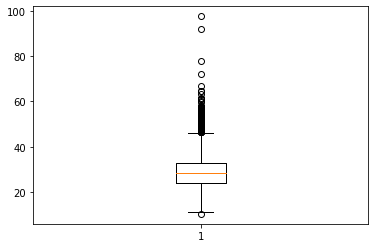

In [27]:
numercal_columns = ['age', 'avg_glucose_level', 'bmi']
plt.boxplot(x['bmi']) 
#check for outliers visually- outliers present in bmi

{'whiskers': [<matplotlib.lines.Line2D at 0x23ad1e5db50>,
 'caps': [<matplotlib.lines.Line2D at 0x23ad1e6b250>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ad1e5d7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x23ad1e6b910>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ad1e6bc70>],
 'means': []}

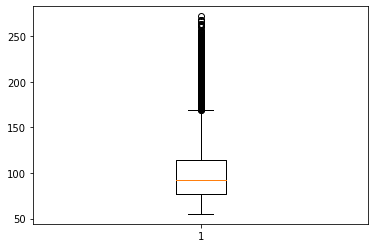

In [28]:
plt.boxplot(x['avg_glucose_level']) #outliers present

{'whiskers': [<matplotlib.lines.Line2D at 0x23ad1eb8a00>,
 'caps': [<matplotlib.lines.Line2D at 0x23ad1ec8100>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ad1eb8670>],
 'medians': [<matplotlib.lines.Line2D at 0x23ad1ec87c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ad1ec8b20>],
 'means': []}

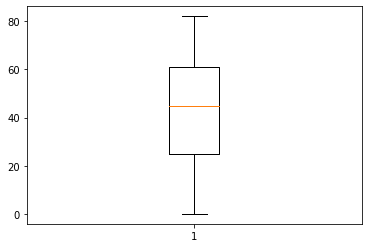

In [29]:
plt.boxplot(x['age']) #no outliers here

In [30]:
x.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.585910,0.414090,0.343836,0.656164,0.128571,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.492612,0.492612,0.475034,0.475034,0.334758,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
#creating function to deal with outliers
#dealing with average glucose levels outliers
def outliers_deal(value):
    if value > ul2:
        return ul2
    elif value < ll2:
        return ll2
    else:
        return value
x['avg_glucose_level'] = x['avg_glucose_level'].apply(outliers_deal)

In [32]:
#dealing with bmi outliers
def outliers_deal(value):
    if value > ul3:
        return ul3
    elif value < ll3:
        return ll3
    else:
        return value
x['bmi'] = x['bmi'].apply(outliers_deal)

In [33]:
x.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,100.996204,28.721613,0.585910,0.414090,0.343836,0.656164,0.128571,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,33.214738,7.119940,0.492612,0.492612,0.475034,0.475034,0.334758,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,169.357500,46.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   gender_Female                   5110 non-null   uint8  
 6   gender_Male                     5110 non-null   uint8  
 7   ever_married_No                 5110 non-null   uint8  
 8   ever_married_Yes                5110 non-null   uint8  
 9   work_type_Govt_job              5110 non-null   uint8  
 10  work_type_Never_worked          5110 non-null   uint8  
 11  work_type_Private               5110 non-null   uint8  
 12  work_type_Self-employed         51

In [35]:
corr = x.corr()
corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276398,0.263796,0.199720,0.352852,0.027924,-0.027924,-0.679125,0.679125,0.130013,-0.078653,0.116534,0.327989,-0.634215,-0.014180,0.014180,-0.378231,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.156811,0.156555,-0.021143,0.021143,-0.164243,0.164243,0.017685,-0.021608,-0.005413,0.115442,-0.129506,0.007913,-0.007913,-0.141501,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.139785,0.046796,-0.085617,0.085617,-0.114644,0.114644,0.001330,-0.015712,0.000027,0.086760,-0.091634,-0.003092,0.003092,-0.066731,0.066804,-0.021856,0.044049
avg_glucose_level,0.199720,0.156811,0.139785,1.000000,0.153273,-0.054355,0.054355,-0.133309,0.133309,0.009440,-0.009808,0.014101,0.052458,-0.084246,0.006061,-0.006061,-0.077777,0.053182,0.021979,0.013773
bmi,0.352852,0.156555,0.046796,0.153273,1.000000,0.023725,-0.023725,-0.357612,0.357612,0.085547,-0.029336,0.210981,0.079042,-0.469297,-0.004375,0.004375,-0.284152,0.115052,0.110860,0.092467
gender_Female,0.027924,-0.021143,-0.085617,-0.054355,0.023725,1.000000,-1.000000,-0.030483,0.030483,0.016685,-0.011469,0.032294,0.026143,-0.089120,-0.006340,0.006340,-0.059393,-0.043603,0.099111,-0.011306
gender_Male,-0.027924,0.021143,0.085617,0.054355,-0.023725,-1.000000,1.000000,0.030483,-0.030483,-0.016685,0.011469,-0.032294,-0.026143,0.089120,0.006340,-0.006340,0.059393,0.043603,-0.099111,0.011306
ever_married_No,-0.679125,-0.164243,-0.114644,-0.133309,-0.357612,-0.030483,0.030483,1.000000,-1.000000,-0.134041,0.090838,-0.153830,-0.192716,0.544441,0.006261,-0.006261,0.332081,-0.171256,-0.102845,-0.105226
ever_married_Yes,0.679125,0.164243,0.114644,0.133309,0.357612,0.030483,-0.030483,-1.000000,1.000000,0.134041,-0.090838,0.153830,0.192716,-0.544441,-0.006261,0.006261,-0.332081,0.171256,0.102845,0.105226
work_type_Govt_job,0.130013,0.017685,0.001330,0.009440,0.085547,0.016685,-0.016685,-0.134041,0.134041,1.000000,-0.025258,-0.444420,-0.167810,-0.151383,-0.013131,0.013131,-0.097418,0.029686,0.046908,0.030026


<AxesSubplot:>

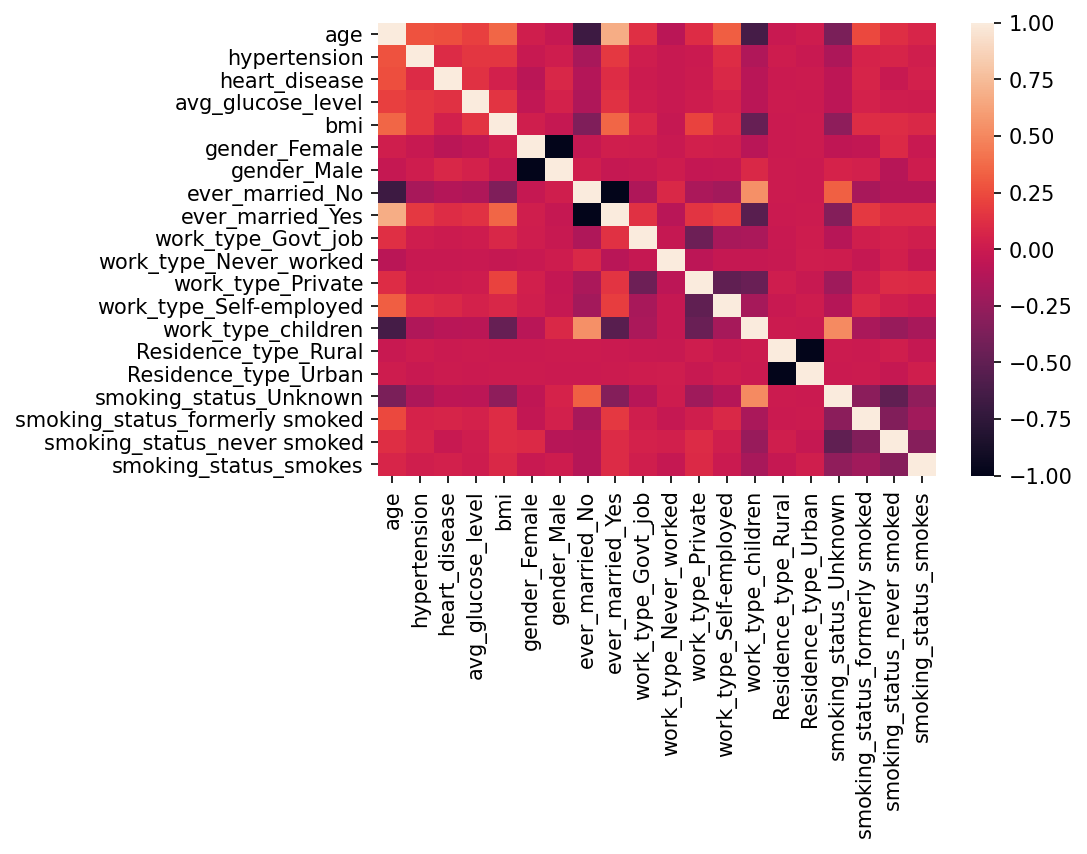

In [36]:
# plotting the heat map of correlation matrix using seaborn library
plt.figure(dpi=150)
sns.heatmap(x.corr(), xticklabels= corr.columns, yticklabels= corr.columns)

<Figure size 600x400 with 0 Axes>

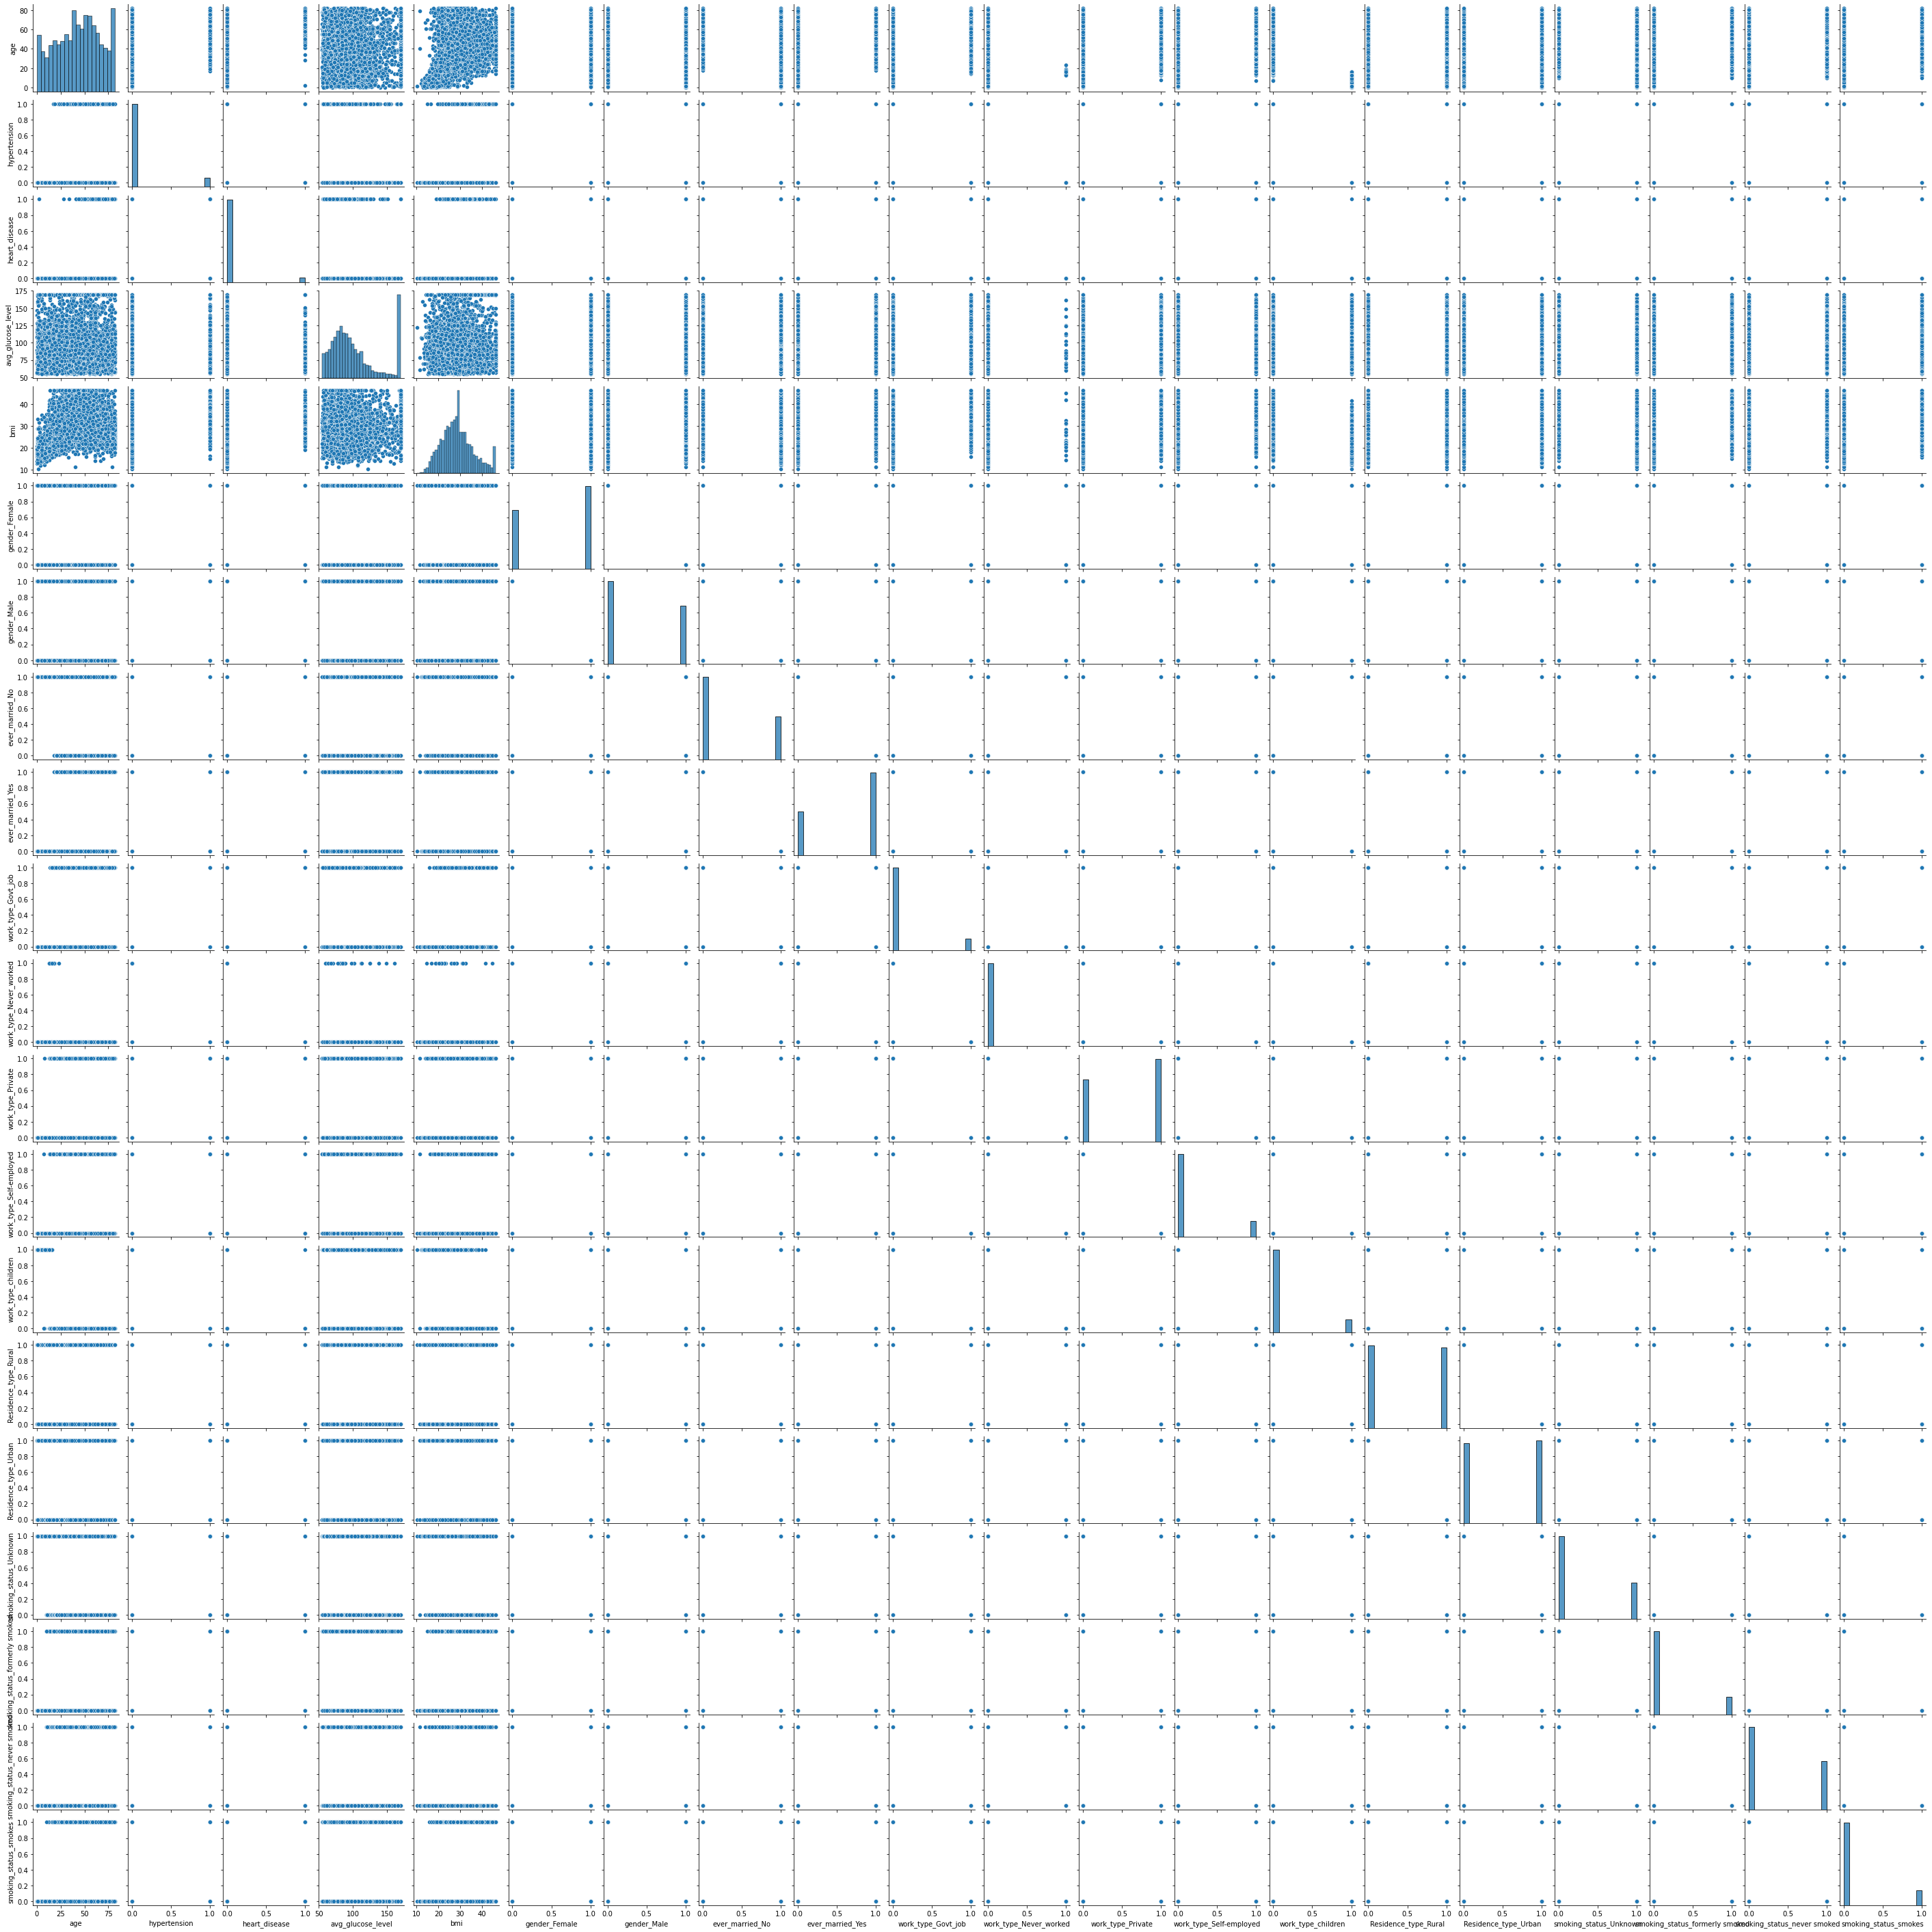

In [37]:
plt.figure(dpi=100)
sns.pairplot(x,height=2,palette='OrRd')
plt.show() # one can observe the correlation between different variable

In [38]:
x = x.rename(columns={'smoking_status_never smoked':'smoking_status_never_smoked','smoking_status_formerly smoked':'smoking_status_formerly_smoked'})

In [39]:
## we will use VIF to calculate and remove the features which are highly correlated
columns = ['age','hypertension','heart_disease','avg_glucose_level','bmi','gender_Female','gender_Male',	'ever_married_No','ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Rural'	,'Residence_type_Urban'	'smoking_status_Unknown'	,'smoking_status_formerly smoked'	,'smoking_status_never smoked',	'smoking_status_smokes' ]

In [40]:
#splitting dataset into training and set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)


In [42]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred)

1.0

In [43]:
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9383561643835616

In [44]:
#Visualizing the important features
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
predict = clf.predict(x_test)

In [45]:
feature_importace = pd.Series(clf.feature_importances_ , index=x.columns).sort_values(ascending=False)
feature_importace

age                               0.261541
bmi                               0.240218
avg_glucose_level                 0.199445
heart_disease                     0.027967
hypertension                      0.027874
smoking_status_never_smoked       0.024312
gender_Male                       0.021941
work_type_Private                 0.021353
Residence_type_Rural              0.020686
Residence_type_Urban              0.020282
smoking_status_Unknown            0.019971
smoking_status_formerly_smoked    0.019819
work_type_Self-employed           0.019647
smoking_status_smokes             0.019042
gender_Female                     0.018570
work_type_Govt_job                0.014869
ever_married_Yes                  0.010680
ever_married_No                   0.010506
work_type_children                0.001257
work_type_Never_worked            0.000021
dtype: float64

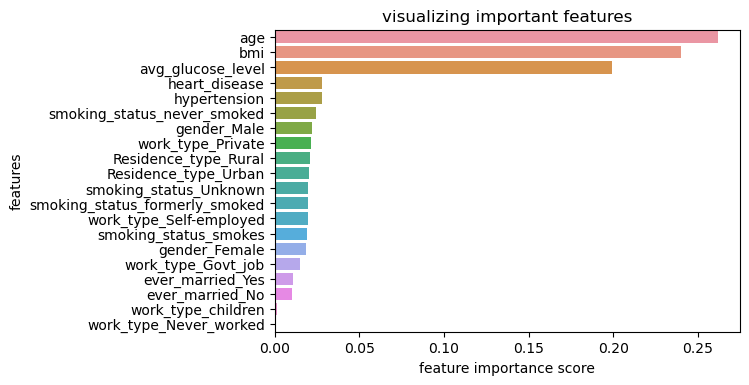

In [46]:
plt.figure(dpi=100)
sns.barplot(x = feature_importace, y = feature_importace.index )
plt.xlabel('feature importance score')
plt.ylabel('features')
plt.title('visualizing important features')
plt.show()
# now what we can do is that we can retrain our model on selected features. the more the value the more the feature is important.